In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model

from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data=pd.read_csv('Salaries.csv')  # read the data
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)

print(data.isna().sum())

#printing the summary of data type
data.info() 

(397, 6)
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [4]:
data.drop_duplicates(inplace=True)

print(data.shape)

(393, 6)


In [5]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,393,393,393.000000,393.000000,393,393.000000
unique,3,2,NaN,NaN,2,NaN
top,Prof,B,NaN,NaN,Male,NaN
freq,266,212,NaN,NaN,354,NaN
mean,NaN,NaN,22.503817,17.755725,NaN,113930.844784
std,NaN,NaN,12.814637,12.996129,NaN,30360.608788
min,NaN,NaN,1.000000,0.000000,NaN,57800.000000
25%,NaN,NaN,12.000000,7.000000,NaN,91000.000000
50%,NaN,NaN,21.000000,17.000000,NaN,107500.000000
75%,NaN,NaN,32.000000,27.000000,NaN,134550.000000


In [6]:
# finding the how many male and female are in discipline column
print(data.groupby("sex")['discipline'].value_counts())

sex     discipline
Female  B              21
        A              18
Male    B             191
        A             163
Name: discipline, dtype: int64


In [7]:
# finding the how many male and female are in rank column
print(data.groupby("sex")['rank'].value_counts())

sex     rank     
Female  Prof          18
        AsstProf      11
        AssocProf     10
Male    Prof         248
        AssocProf     54
        AsstProf      52
Name: rank, dtype: int64


In [8]:
# Lets frist covert categorical data(sex,rank & discipline) into int 

from sklearn.preprocessing import LabelEncoder  # to convert object into int
label = LabelEncoder()
df=label.fit_transform(data["sex"]) 
pd.Series(df)
data["sex"]=df

In [9]:
label = LabelEncoder()
df=label.fit_transform(data["discipline"]) 
pd.Series(df)
data["discipline"]=df

In [10]:
df=pd.get_dummies(data["rank"])
df.tail(2)

,AssocProf,AsstProf,Prof
395,0,0,1
396,0,1,0


In [11]:
data=data.join(df)
data.shape

(393, 9)

In [12]:
data=data.drop('rank',axis=1)
data # now our data looks good now lets see the distribusion

,discipline,yrs.since.phd,yrs.service,sex,salary,AssocProf,AsstProf,Prof
0,1,19,18,1,139750,0,0,1
1,1,20,16,1,173200,0,0,1
2,1,4,3,1,79750,0,1,0
3,1,45,39,1,115000,0,0,1
4,1,40,41,1,141500,0,0,1
...,...,...,...,...,...,...,...,...
392,0,33,30,1,103106,0,0,1
393,0,31,19,1,150564,0,0,1
394,0,42,25,1,101738,0,0,1
395,0,25,15,1,95329,0,0,1


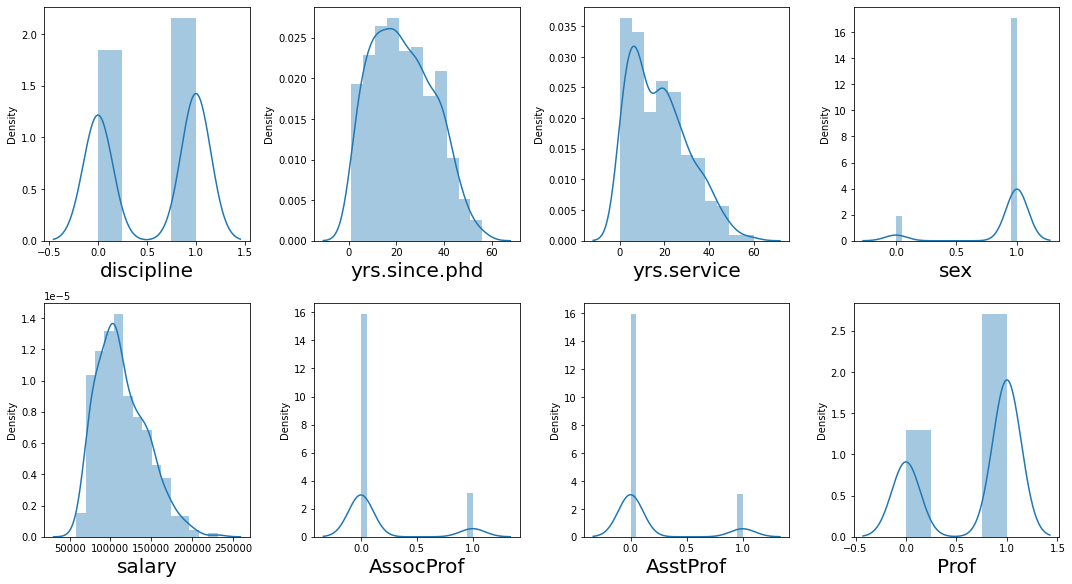

In [13]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

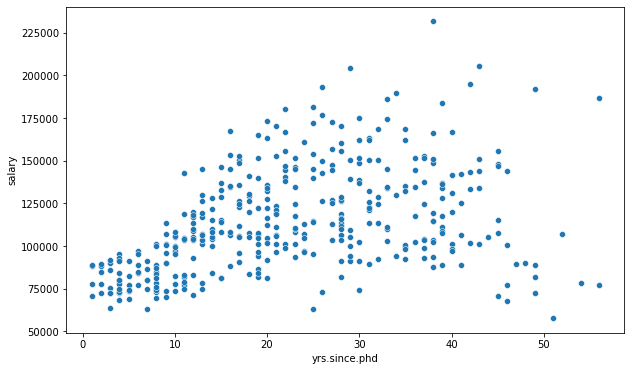

In [14]:
plt.figure(figsize =(10, 6))
sns.scatterplot(y ='salary', x ='yrs.since.phd', data = data)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

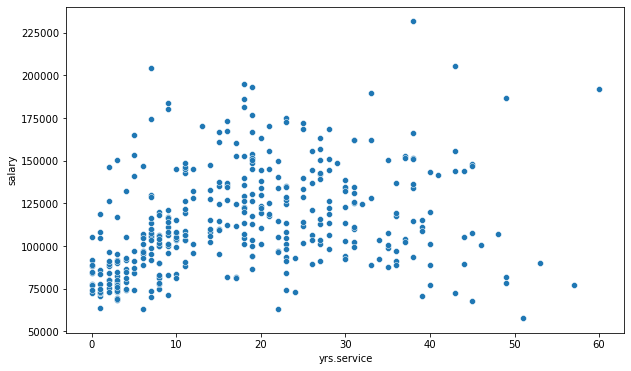

In [15]:
plt.figure(figsize =(10, 6))
sns.scatterplot(y ='salary', x ='yrs.service', data = data)

<AxesSubplot:xlabel='sex', ylabel='salary'>

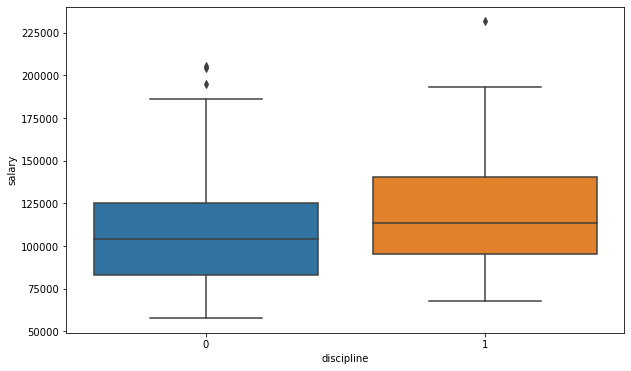

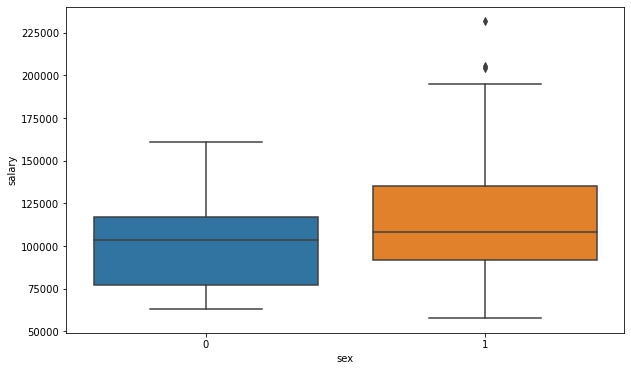

In [16]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='salary', x ='discipline', data = data)

plt.figure(figsize =(10, 6))
sns.boxplot(y ='salary', x ='sex', data = data)

In [17]:
#As outliers present in salary first remove it 
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [18]:
salary_H=(q3.salary+(1.5*iqr.salary))

In [19]:
Index=np.where(data['salary']>salary_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([ 43, 245, 360], dtype=int64),)


(390, 8)

In [20]:
data.reset_index()
data=data.drop('index',axis=1)
data.tail(3)

KeyError: "['index'] not found in axis"

<AxesSubplot:xlabel='sex', ylabel='salary'>

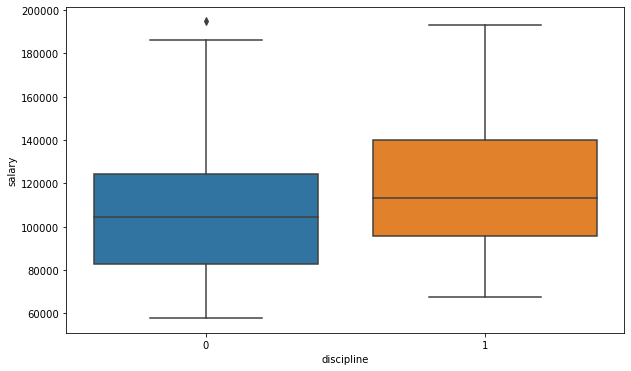

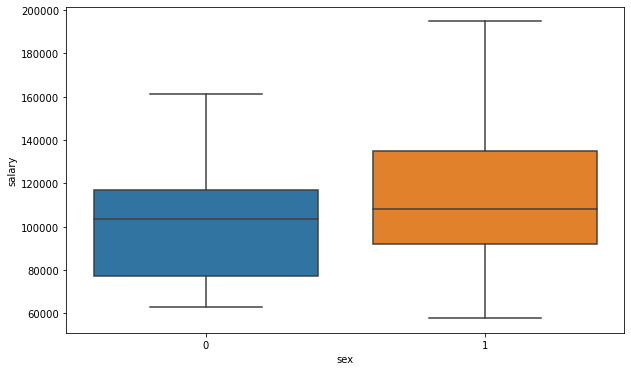

In [21]:
# CHeck distribusion after removing outliers

plt.figure(figsize =(10, 6))
sns.boxplot(y ='salary', x ='discipline', data = data)

plt.figure(figsize =(10, 6))
sns.boxplot(y ='salary', x ='sex', data = data)


In [22]:
from sklearn.preprocessing import PowerTransformer

fetures=['discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary',
       'AssocProf', 'AsstProf', 'Prof']
pt=PowerTransformer()
data[fetures]=pt.fit_transform(data[fetures].values)

In [23]:
data[fetures]

,discipline,yrs.since.phd,yrs.service,sex,salary,AssocProf,AsstProf,Prof
0,0.921054,-0.138596,0.240621,0.333333,0.956970,-0.443079,-0.438931,0.694903
1,0.921054,-0.059654,0.093886,0.333333,1.769761,-0.443079,-0.438931,0.694903
2,0.921054,-1.652293,-1.297770,0.333333,-1.253051,-0.443079,2.278262,-1.439050
3,0.921054,1.574036,1.423769,0.333333,0.203215,-0.443079,-0.438931,0.694903
4,0.921054,1.284854,1.515194,0.333333,1.004589,-0.443079,-0.438931,0.694903
...,...,...,...,...,...,...,...,...
392,-1.085712,0.854124,0.975829,0.333333,-0.225501,-0.443079,-0.438931,0.694903
393,-1.085712,0.724471,0.310667,0.333333,1.241276,-0.443079,-0.438931,0.694903
394,-1.085712,1.402187,0.693880,0.333333,-0.278277,-0.443079,-0.438931,0.694903
395,-1.085712,0.313755,0.016784,0.333333,-0.536398,-0.443079,-0.438931,0.694903


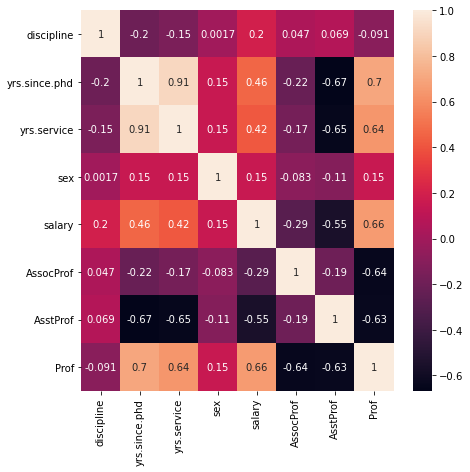

In [24]:
#check multicolinearity
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [25]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['salary'])
y=data['salary']

In [26]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)


In [27]:
#Split data into train & test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=4550)

# lets Build regression model for salary prediction

In [28]:
def print_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",r2_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",r2_score(y_test,pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
        print("MAE:",mean_absolute_error(y_test,pred))
        print("MSE:",mean_squared_error(y_test,pred))

In [29]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.

from sklearn.model_selection import cross_val_score, KFold

def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train,cv=2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [30]:
# Model no.1
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

lcv=LassoCV(alphas=None,max_iter=10000,normalize=True)
lcv.fit(x_train,y_train)
alpha=lcv.alpha_
print(alpha)
Lasso_reg=Lasso(alpha).fit(x_train,y_train)

print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=True)
print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=False)
model_accuracy(Lasso_reg)

4.095650512641934e-05
Train Report: 0.5454185715190656
Test Report: 0.5102973001553774
RMSE: 0.6956556726081918
MAE: 0.5442032210781246
MSE: 0.4839368148319557
Accuracy: 52.46 %
Standard Deviation: 2.05 %


In [31]:
# Model no.2
from sklearn.ensemble import RandomForestRegressor

rand_regressor= RandomForestRegressor()
rand_regressor.fit(x_train,y_train)

print_score(rand_regressor,x_train,x_test,y_train,y_test,train=True)
print_score(rand_regressor,x_train,x_test,y_train,y_test,train=False)
model_accuracy(rand_regressor)

Train Report: 0.8956572007646617
Test Report: 0.4298252070946875
RMSE: 0.7506406656037903
MAE: 0.5693641522670925
MSE: 0.5634614088581014
Accuracy: 41.79 %
Standard Deviation: 2.08 %


In [32]:
# Model no.3
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9624276970951988
Test Report: 0.3108187443499344
RMSE: 0.8252676287302602
MAE: 0.6247647610515136
MSE: 0.6810666590300666
Accuracy: 25.33 %
Standard Deviation: 7.20 %


In [33]:
#Model no.4
from sklearn.ensemble import GradientBoostingRegressor

gbdt=GradientBoostingRegressor()

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.7920682759234966
Test Report: 0.48706868633506895
RMSE: 0.7119634323500994
MAE: 0.5435109365151899
MSE: 0.5068919290037346
Accuracy: 31.20 %
Standard Deviation: 9.00 %


In [34]:
#Model no.5
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test,train=True)
print_score(dt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(dt)

Train Report: 0.9658792056243102
Test Report: 0.011252261937005681
RMSE: 0.9884867065129654
MAE: 0.7248273628164303
MSE: 0.9771059689528495
Accuracy: 5.04 %
Standard Deviation: 2.35 %


In [35]:
#Model no.6
from sklearn.ensemble import BaggingRegressor

bb=BaggingRegressor()

bb.fit(x_train,y_train)

print_score(bb,x_train,x_test,y_train,y_test,train=True)
print_score(bb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(bb)

Train Report: 0.8826808874067005
Test Report: 0.44879080317212994
RMSE: 0.7380508915829735
MAE: 0.563473064292612
MSE: 0.5447191185664222
Accuracy: 37.87 %
Standard Deviation: 5.93 %


In [36]:
# Model no.7
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test,train=True)
print_score(ada,x_train,x_test,y_train,y_test,train=False)
model_accuracy(ada)

Train Report: 0.6262530764807834
Test Report: 0.5069781535834803
RMSE: 0.6980092269605049
MAE: 0.5543170641394937
MSE: 0.48721688092200166
Accuracy: 46.91 %
Standard Deviation: 4.25 %


In [37]:
# Hyper tuning by using GridSearchCV
from sklearn.model_selection import GridSearchCV

para={'max_depth':range(0,12,2),'learning_rate':[0.25,0.1,0.3,0.4],'n_estimators':[20,50,70],'gamma':[0.20,0.3,0.002,0.001,0.1]}
grid=GridSearchCV(estimator=xgb, param_grid=para,cv=5)
grid.fit(x_train,y_train)

grid.best_params_

{'gamma': 0.002, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}

In [39]:
xgb=XGBRegressor(learning_rate= 0.1, max_depth=2, n_estimators=50, gamma=0.002)
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.6269295624844142
Test Report: 0.5374695028191623
RMSE: 0.6760802797314769
MAE: 0.5282945090926411
MSE: 0.4570845446417921
Accuracy: 47.28 %
Standard Deviation: 2.26 %


In [40]:
# Hyper tuning by using RandomizedSearchCV With Bagging
from sklearn.model_selection import RandomizedSearchCV

para={'base_estimator':[bb,xgb,dt,gbdt,Lasso_reg,ada,rand_regressor],'n_estimators':range(0,100,4),'random_state':[40,60,20]}
rand=RandomizedSearchCV(estimator=bb, cv=3,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'random_state': 60, 'n_estimators': 12, 'base_estimator': AdaBoostRegressor()}

In [43]:
bb=BaggingRegressor(base_estimator=ada, n_estimators=12, random_state=60)

bb.fit(x_train,y_train)

print_score(bb,x_train,x_test,y_train,y_test,train=True)
print_score(bb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(bb)

Train Report: 0.6128388056726493
Test Report: 0.51861207724371
RMSE: 0.6897245378110574
MAE: 0.5421571735972873
MSE: 0.47571993805867663
Accuracy: 50.44 %
Standard Deviation: 0.82 %


# so, from accuracy(50.44%) i m selecting baggingregressor with randomsearchcv model with cross validation 